In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
from tqdm import tqdm
import matplotlib
import h5py
import colorsys

import calculation.MeanFieldv2 as MFv2
import calculation.CurrentMeirv2 as CsMv2
import calculation.SusceptibilitySimpv2 as Susceptv2

from matplotlib.colors import LinearSegmentedColormap
import settings.Constants as const

from matplotlib.colors import LinearSegmentedColormap
import settings.Constants as const

In [2]:
def computeGridLines(lim1=1, num_lines1=3, lim2=3, num_lines2=3):
    
    dense_near_zero = np.linspace(0, lim1, num_lines1)
    sparse_far = np.linspace(lim1, lim2, num_lines2)
    
    grid_lines_pos = np.concatenate([dense_near_zero, sparse_far])
    grid_lines_neg = -grid_lines_pos[::-1] 
    
    grid_lines = np.unique(np.concatenate([grid_lines_neg, grid_lines_pos]))
    
    for x_line in grid_lines:
        plt.axvline(x=x_line, color='#b0b0b0', linewidth=0.8, alpha=0.7)

    plt.xticks(grid_lines[::2], [f"{x:.2f}" for x in grid_lines[::2]])
    plt.grid(True, axis='y')

In [3]:
with h5py.File('h5_output_data/2-PlotsDataTZero.h5', 'r') as f:
    omegaSpaceZero = f['omegaSpace'][:]
    XRZeroOmegaZero = f['XRZeroOmega'][:]
    XRLowerOmegaZero = f['XRLowerOmega'][:]
    XRCriticalOmegaZero = f['XRCriticalOmega'][:]
    XRUpperOmegaZero = f['XRUpperOmega'][:]
    XKZeroOmegaZero = f['XKZeroOmega'][:]
    XKLowerOmegaZero = f['XKLowerOmega'][:]
    XKUpperOmegaZero = f['XKUpperOmega'][:]
    XKCriticalOmegaZero = f['XKCriticalOmega'][:]
    
    voltageSpaceZero = f['voltageSpacePlot'][:]
    XRVoltageZero = f['XRZeroOmegaZero'][:]
    XKVoltageZero = f['XKZeroOmegaZero'][:]
    
    fitRatioInvFDCriticalZero = f['fitRatioInvFDCritical'][:]
    fitRatioInvFDUpperZero = f['fitRatioInvFDUpper'][:]
    fitRatioInvFDLowerZero = f['fitRatioInvFDLower'][:]
    
    newOmegaFDZero = f['newOmegaFD'][:]
    OmegaFDZero = f['OmegaFD'][:]
    
    ratioInvFDZeroZero = f['ratioInvFDCZero'][:]
    ratioInvFDCriticalZero = f['ratioInvFDCritical'][:]
    ratioInvFDUpperCriticalZero = f['ratioInvFDUpper'][:]
    ratioInvFDLowerCriticalZero = f['ratioInvFDLower'][:]
    
    f.close()

In [4]:
with h5py.File('h5_output_data/2-PlotsDataTFinite.h5', 'r') as f:
    omegaSpaceFinite = f['omegaSpace'][:]
    XRZeroOmegaFinite = f['XRZeroOmega'][:]
    XRLowerOmegaFinite = f['XRLowerOmega'][:]
    XRCriticalOmegaFinite = f['XRCriticalOmega'][:]
    XRUpperOmegaFinite = f['XRUpperOmega'][:]
    XKZeroOmegaFinite = f['XKZeroOmega'][:]
    XKLowerOmegaFinite = f['XKLowerOmega'][:]
    XKUpperOmegaFinite = f['XKUpperOmega'][:]
    XKCriticalOmegaFinite = f['XKCriticalOmega'][:]
    
    voltageSpaceFinite = f['voltageSpacePlot'][:]
    XRVoltageFinite = f['XRZeroOmegaZero'][:]
    XKVoltageFinite = f['XKZeroOmegaZero'][:]
    
    fitRatioInvFDCriticalFinite = f['fitRatioInvFDCritical'][:]
    fitRatioInvFDUpperFinite = f['fitRatioInvFDUpper'][:]
    fitRatioInvFDLowerFinite = f['fitRatioInvFDLower'][:]
    
    newOmegaFDFinite = f['newOmegaFD'][:]
    OmegaFDFinite = f['OmegaFD'][:]
    
    ratioInvFDZeroFinite = f['ratioInvFDCZero'][:]
    ratioInvFDCriticalFinite = f['ratioInvFDCritical'][:]
    ratioInvFDUpperCriticalFinite = f['ratioInvFDUpper'][:]
    ratioInvFDLowerCriticalFinite = f['ratioInvFDLower'][:]
    
    f.close()

In [5]:
Lambda = 2.0

voltageZero = 0.0/Lambda
voltageLower = 1.08/Lambda
voltageCritical = 1.43/Lambda
voltageUpper = 1.78/Lambda

colorsVoltageZero = [cm.Reds(i) for i in [0.5, 0.5, 0.8, 1.0]]
colorsVoltageFinite = [cm.Greens(i) for i in [1.0, 1.0, 1.0, 1.0]]


In [6]:
plt.figure()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

<Figure size 640x480 with 0 Axes>

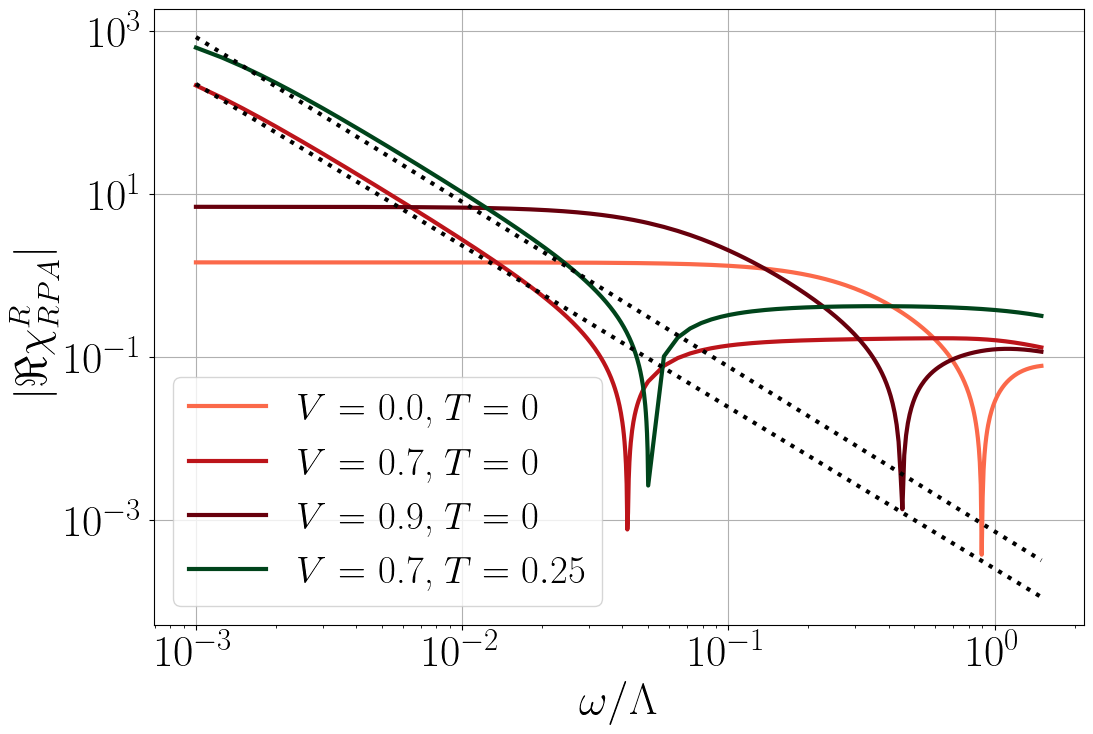

In [7]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

idx_mod = np.where( omegaSpaceZero/Lambda < 1e-3)[0]

omegaSpaceZeroMod = omegaSpaceZero.copy()
omegaSpaceZeroMod[idx_mod] = np.nan

ax.plot(omegaSpaceZeroMod/Lambda, np.abs(XRZeroOmegaZero.real), label=r'$V$ = ' + str(round(voltageZero,1)) + r", $T=0$" , color=colorsVoltageZero[0], linewidth=3)
ax.plot(omegaSpaceZeroMod/Lambda, np.abs(XRCriticalOmegaZero.real), label=r'$V$ = ' + str(round(voltageCritical,1)) + r", $T=0$", color=colorsVoltageZero[2], linewidth=3)
ax.plot(omegaSpaceZeroMod/Lambda, np.abs(XRUpperOmegaZero.real), label=r'$V$ = ' + str(round(voltageUpper,1)) + r", $T=0$", color=colorsVoltageZero[3], linewidth=3)
ax.plot(omegaSpaceZeroMod/Lambda, np.abs(XRCriticalOmegaFinite.real), color=colorsVoltageFinite[2], label=r'$V$ = ' + str(round(voltageCritical,1)) + r", $T=0.25$", linewidth=3)

XRZeroOmegaZeroFit = 10**(-1.981791*np.log10(omegaSpaceZeroMod) -3.000484)
XRZeroOmegaFiniteFit = 10**(-2.0212*np.log10(omegaSpaceZeroMod) -2.53152)

plt.plot(omegaSpaceZeroMod/Lambda, np.abs(XRZeroOmegaZeroFit), color='black', linewidth=3, linestyle='dotted')
plt.plot(omegaSpaceZeroMod/Lambda, np.abs(XRZeroOmegaFiniteFit), color='black', linewidth=3, linestyle='dotted')

plt.yscale('log')
plt.xscale('log')
plt.grid()
# computeGridLines(1, 3, 3, 4)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=28)
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
plt.ylabel(r'$| \Re \chi^R_{RPA} |$', fontsize=32)

plt.savefig('panels/XR_Re_Susceptibility_paper.png', bbox_inches='tight', dpi=600)


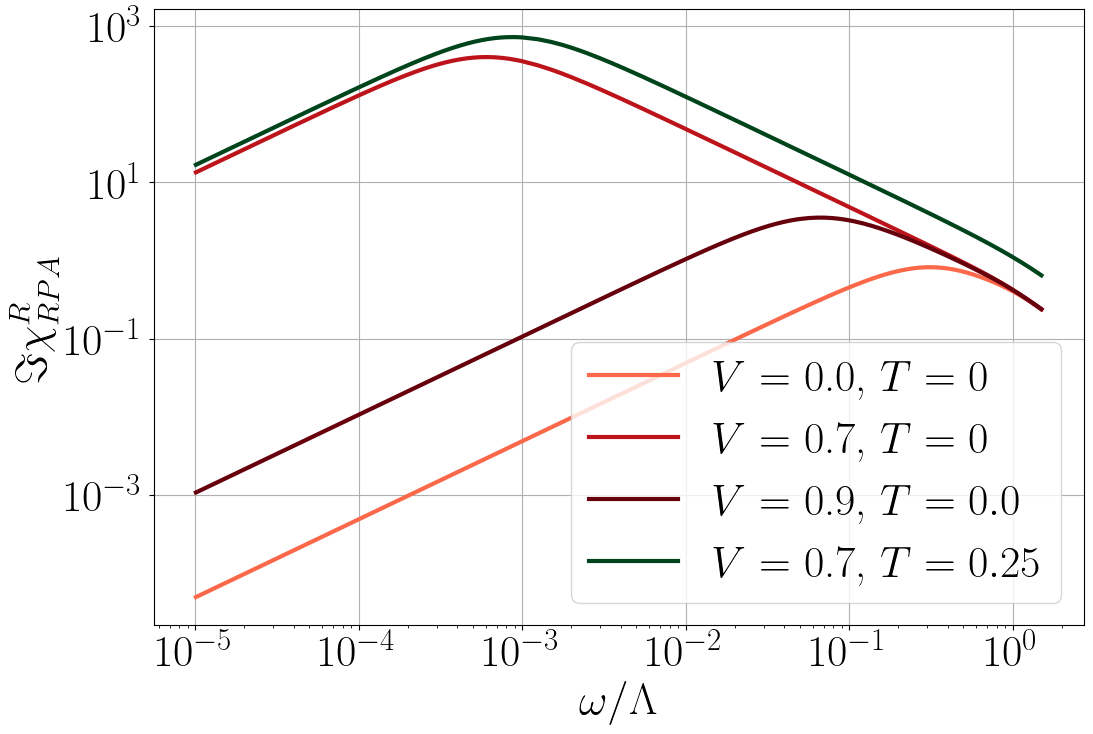

In [8]:


import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D


class MultiColorLineHandler1(HandlerLine2D):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        x = [xdescent, xdescent + width/2., xdescent + width]
        y = [ydescent + height/2.] * 3
        line1 = Line2D(x[:2], y[:2], color=colorsVoltageZero[0])
        line2 = Line2D(x[1:], y[1:], color=colorsVoltageFinite[0])
        return [line1, line2]

class MultiColorLineHandler2(HandlerLine2D):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        x = [xdescent, xdescent + width/2., xdescent + width]
        y = [ydescent + height/2.] * 3
        line1 = Line2D(x[:2], y[:2], color=colorsVoltageZero[1])
        line2 = Line2D(x[1:], y[1:], color=colorsVoltageFinite[1])
        return [line1, line2]   

class MultiColorLineHandler3(HandlerLine2D):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        x = [xdescent, xdescent + width/2., xdescent + width]
        y = [ydescent + height/2.] * 3
        line1 = Line2D(x[:2], y[:2], color=colorsVoltageZero[2])
        line2 = Line2D(x[1:], y[1:], color=colorsVoltageFinite[2])
        return [line1, line2]

class MultiColorLineHandler4(HandlerLine2D):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        
        x = [xdescent, xdescent + width/2., xdescent + width]
        y = [ydescent + height/2.] * 3
        line1 = Line2D(x[:2], y[:2], color=colorsVoltageZero[3])
        line2 = Line2D(x[1:], y[1:], color=colorsVoltageFinite[3])
        return [line1, line2]



fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

idx_mod = np.where(omegaSpaceZero/Lambda < 1e-6)[0]
omegaSpaceZeroMod = omegaSpaceZero.copy()
omegaSpaceZeroMod[idx_mod] = np.nan

ax.plot(omegaSpaceZeroMod/Lambda, -(XRZeroOmegaZero.imag), label=r'$V$ = ' + str(round(voltageZero,1)) + r", $T=0$", color=colorsVoltageZero[0], linewidth=3)

ax.plot(omegaSpaceZeroMod/Lambda, -(XRCriticalOmegaZero.imag), label=r'$V$ = ' + str(round(voltageCritical,1))+ r", $T=0$", color=colorsVoltageZero[2], linewidth=3)
ax.plot(omegaSpaceZeroMod/Lambda, -(XRUpperOmegaZero.imag), label=r'$V$ = ' + str(round(voltageUpper,1)) + r", $T=0.0$", color=colorsVoltageZero[3], linewidth=3)
ax.plot(omegaSpaceZeroMod/Lambda, -(XRCriticalOmegaFinite.imag), label=r'$V$ = ' + str(round(voltageCritical,1)) + r", $T=0.25$", color=colorsVoltageFinite[2], linewidth=3)

plt.yscale('log')
plt.xscale('log')
plt.grid()

ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.legend(fontsize=32)

multicolor_handle1 = Line2D([0], [0], color='black')
multicolor_handle2 = Line2D([1], [1], color='black')
multicolor_handle3 = Line2D([2], [2], color='black')
multicolor_handle4 = Line2D([3], [3], color='black')

plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
plt.ylabel(r'$\Im \chi^R_{RPA}$', fontsize=32)
plt.savefig('panels/XR_Im_Susceptibility_paper.png', bbox_inches='tight', dpi=600)



coeffsZero [-1.96276855 -0.02444163]
coeffsFinite [-1.96589235  0.59429299]


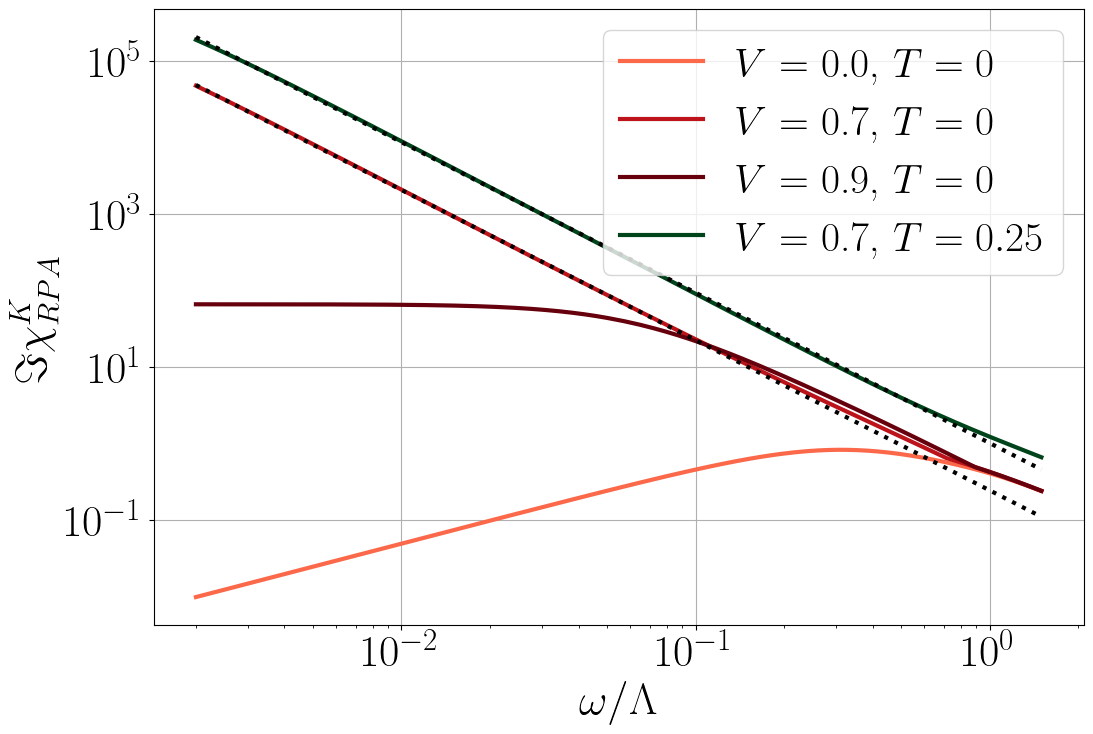

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

idx_mod = np.where( omegaSpaceZero/Lambda < 2e-3)[0]
omegaSpaceZeroMod = omegaSpaceZero.copy()
omegaSpaceZeroMod[idx_mod] = np.nan


ax.plot(omegaSpaceZeroMod/Lambda, np.abs(XKZeroOmegaZero.imag), label=r'$V$ = ' + str(round(voltageZero,1)) + r", $T=0$", color=colorsVoltageZero[0], linewidth=3)
ax.plot(omegaSpaceZeroMod/Lambda, np.abs(XKCriticalOmegaZero.imag), label=r'$V$ = ' + str(round(voltageCritical,1)) + r", $T=0$", color=colorsVoltageZero[2], linewidth=3)
ax.plot(omegaSpaceZeroMod/Lambda, np.abs(XKUpperOmegaZero.imag), label=r'$V$ = ' + str(round(voltageUpper,1)) + r", $T=0$", color=colorsVoltageZero[3], linewidth=3)
ax.plot(omegaSpaceZeroMod/Lambda, np.abs(XKCriticalOmegaFinite.imag),  color=colorsVoltageFinite[2], label=r'$V$ = ' + str(round(voltageCritical,1)) + r", $T=0.25$", linewidth=3)


#### Linear Fit
omegaSpaceZeroFit_idx = np.where(np.logical_and(omegaSpaceZero/Lambda < 1e-1, omegaSpaceZero/Lambda > 1e-3))[0]
omegaSpaceZeroFit = omegaSpaceZero[omegaSpaceZeroFit_idx]
XKZeroOmegaZeroFit = XKCriticalOmegaZero[omegaSpaceZeroFit_idx]
XKZeroOmegaFiniteFit = XKCriticalOmegaFinite[omegaSpaceZeroFit_idx]

logXKZeroOmegaZeroFit = np.log10(np.abs(XKZeroOmegaZeroFit.imag))
logXKZeroOmegaFiniteFit = np.log10(np.abs(XKZeroOmegaFiniteFit.imag))

logOmegaSpaceZeroFit = np.log10(omegaSpaceZeroFit)


### linear fit with logs
coeffsZero = np.polyfit(logOmegaSpaceZeroFit, logXKZeroOmegaZeroFit, 1)
coeffsFinite = np.polyfit(logOmegaSpaceZeroFit, logXKZeroOmegaFiniteFit, 1)


XKZeroOmegaZeroFit = 10**(coeffsZero[0]*np.log10(omegaSpaceZeroMod) + coeffsZero[1])
XKZeroOmegaFiniteFit = 10**(coeffsFinite[0]*np.log10(omegaSpaceZeroMod) + coeffsFinite[1])
print('coeffsZero', coeffsZero)
print('coeffsFinite', coeffsFinite)


plt.plot(omegaSpaceZeroMod/Lambda, np.abs(XKZeroOmegaZeroFit), linestyle='dotted', color='black', linewidth=3)
plt.plot(omegaSpaceZeroMod/Lambda, np.abs(XKZeroOmegaFiniteFit), linestyle='dotted', color='black', linewidth=3)




plt.yscale('log')
plt.xscale('log')
plt.grid()
# computeGridLines(1, 3, 3, 4)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=30)
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
plt.ylabel(r'$\Im \chi^K_{RPA}$', fontsize=32)
plt.savefig('panels/XK_Im_Susceptibility_paper.png', bbox_inches='tight', dpi=600)

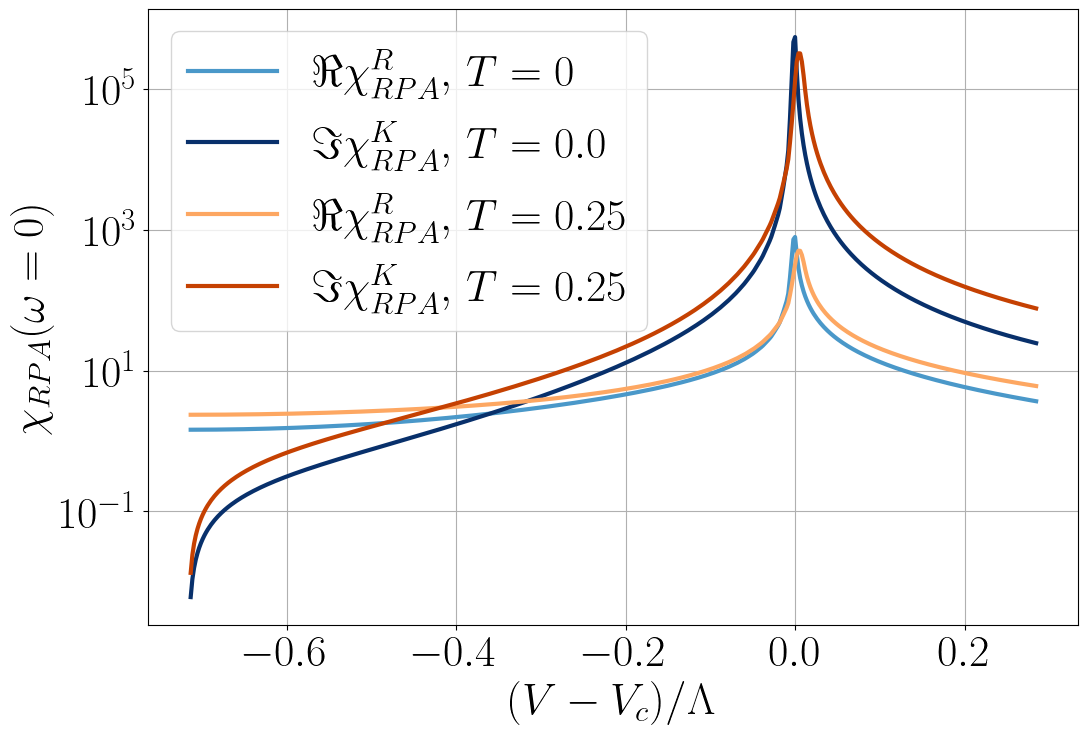

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

colorOmegaZero = [cm.Blues(i) for i in [0.7, 0.9]]
colorOmegaFinite = [cm.Greens(i) for i in [0.7, 1.0]]

idx_max_R = np.argmax(np.abs(XRVoltageZero[1:]))
idx_max_K = np.argmax(np.abs(XKVoltageZero[1:]))

voltageCriticalZeroOmegaR = voltageSpaceZero[idx_max_R+1]
voltageCriticalZeroOmegaK = voltageSpaceZero[idx_max_K+1]

colors1 = [cm.Blues(i) for i in [0.6, 1.0]]
colors2 = [cm.Oranges(i) for i in [0.4, 0.8]]

cell_colours = [
    [colors1[0], colors2[0]],   
    [colors1[1], colors2[1]],   
]

plt.grid()

#
ax.plot((voltageSpaceZero[1:]-voltageCriticalZeroOmegaR)/Lambda, np.abs(XRVoltageZero[1:].real), label=r"$\Re \chi^R_{RPA},$" + r" $T=0$", color=colors1[0], linewidth=3)
ax.plot((voltageSpaceZero[1:]-voltageCriticalZeroOmegaR)/Lambda, np.abs(XKVoltageZero[1:].imag), label=r"$\Im \chi^K_{RPA},$" + r" $T=0.0$", color=colors1[1], linewidth=3)

ax.plot((voltageSpaceZero[1:]-voltageCriticalZeroOmegaR)/Lambda, np.abs(XRVoltageFinite[1:].real), label=r"$\Re \chi^R_{RPA},$" + r" $T=0.25$", color=colors2[0], linewidth=3)
ax.plot((voltageSpaceZero[1:]-voltageCriticalZeroOmegaR)/Lambda, np.abs(XKVoltageFinite[1:].imag), label=r"$\Im \chi^K_{RPA},$" + r" $T=0.25$", color=colors2[1], linewidth=3)


plt.yscale('log')
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.legend(fontsize=32)

plt.xlabel(r'$(V-V_c)/\Lambda$', fontsize=32)
plt.ylabel(r'$\chi_{RPA}(\omega=0)$', fontsize=32)
plt.savefig('panels/XRK_Im_Susceptibility_paper.png', bbox_inches='tight', dpi=600)

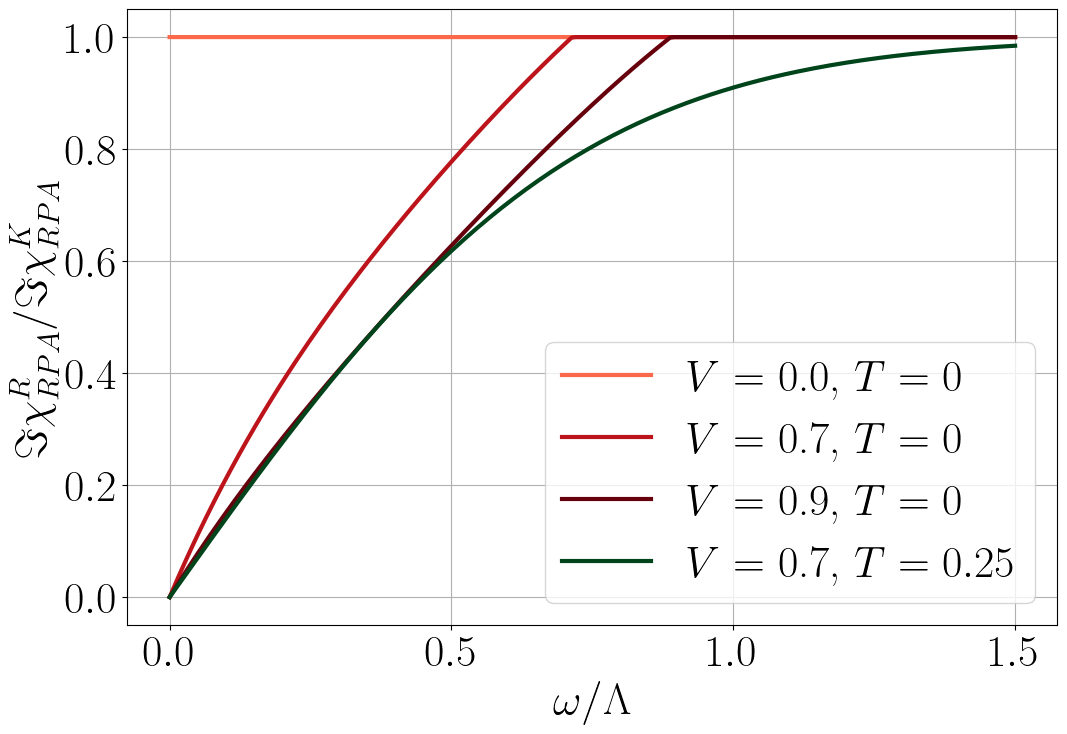

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'


ax.plot(omegaSpaceZero/Lambda, ratioInvFDZeroZero, label=r'$V$ = ' + str(round(voltageZero,1)) + r", $T=0$", color=colorsVoltageZero[0], linewidth=3)
ax.plot(omegaSpaceZero/Lambda, ratioInvFDCriticalZero, label=r'$V$ = ' + str(round(voltageCritical,1)) + r", $T=0$", color=colorsVoltageZero[2], linewidth=3)
ax.plot(omegaSpaceZero/Lambda, ratioInvFDUpperCriticalZero, label=r'$V$ = ' + str(round(voltageUpper,1)) + r", $T=0$", color=colorsVoltageZero[3], linewidth=3)
ax.plot(omegaSpaceZero/Lambda, ratioInvFDCriticalFinite, label=r'$V$ = ' + str(round(voltageCritical,1)) + r", $T=0.25$", color=colorsVoltageFinite[2], linewidth=3)

ax.legend()

ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=32)
plt.xlabel(xlabel=r'$\omega/\Lambda$', fontsize=32)
plt.ylabel(ylabel=r'$\Im\chi^R_{RPA}/\Im \chi_{RPA}^K$', fontsize=32)
plt.grid()
plt.savefig('panels/Ratio_Inv_Fluctuation_Dissipation_Fit.png', bbox_inches='tight', dpi=600)

In [12]:
with h5py.File('h5_output_data/PhaseDiagramZero.h5', 'r') as f:
    boundaryLineZero = f['boundaryLine'][:]
    voltageSpacePlotZero = f['voltageSpacePlot'][:]
    lambdaSpacePlotZero = f['lambdaSpacePlot'][:]
    lambdaSamplesZero = f['lambdaSamples'][:]
    voltageSamplesZero = f['voltageSamples'][:]


with h5py.File('h5_output_data/PhaseDiagramFinite.h5', 'r') as f:
    boundaryLineFinite = f['boundaryLine'][:]
    voltageSpacePlotFinite = f['voltageSpacePlot'][:]
    lambdaSpacePlotFinite = f['lambdaSpacePlot'][:]
    lambdaSamplesFinite = f['lambdaSamples'][:]
    voltageSamplesFinite = f['voltageSamples'][:]

lambdaSamplesZero [0.6 1. ]
lambdaSamplesFinite [0.6 1.2]


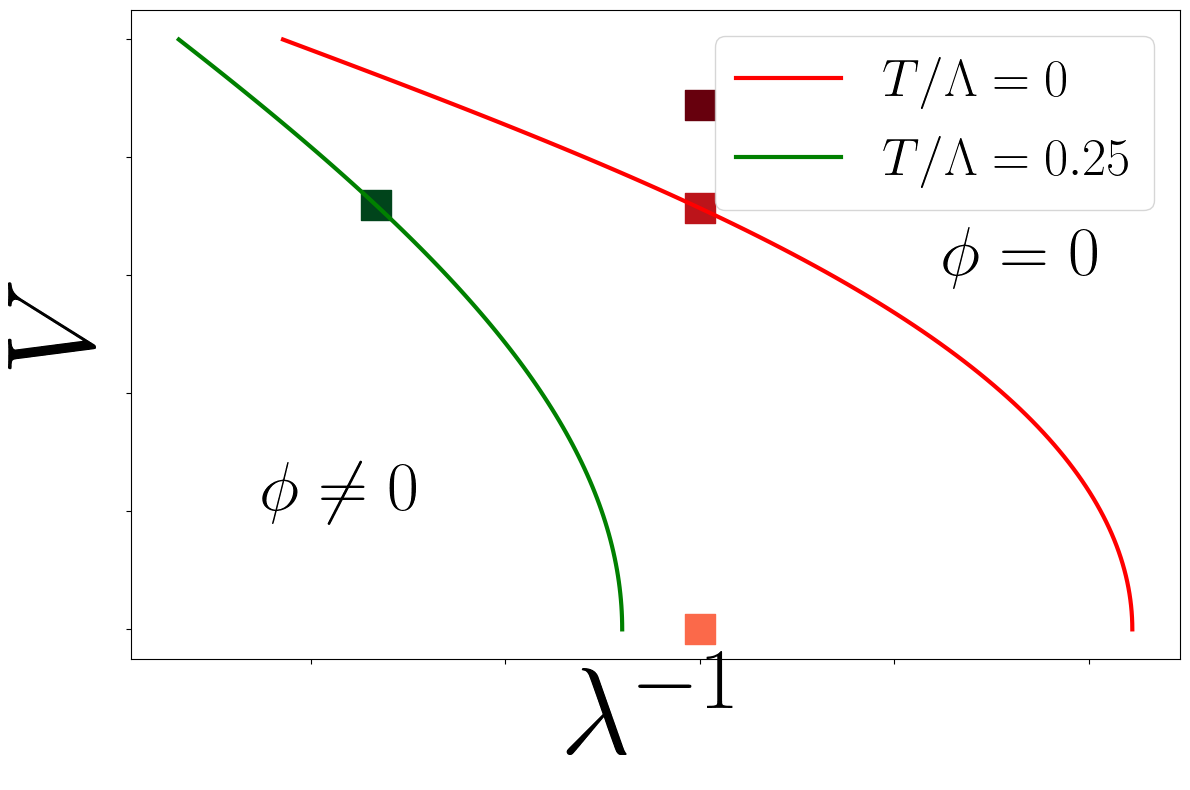

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

ax.plot(2*np.reciprocal(boundaryLineZero), voltageSpacePlotZero/2, color='red', linestyle='solid', linewidth=3, label=r'$T/\Lambda=0$')
ax.plot(2*np.reciprocal(boundaryLineFinite), voltageSpacePlotFinite/2, color='green', linestyle='solid', linewidth=3, label=r'$T/\Lambda=0.25$')


for i in range(len(voltageSamplesZero)):
    if i == 1:
        continue
    ax.scatter(2.0/lambdaSamplesZero[-1], voltageSamplesZero[i]/2, color=colorsVoltageZero[i], marker='s', s=450)

# for i in range(len(voltageSamplesZero)):
ax.scatter(2.0/lambdaSamplesFinite[-1], voltageSamplesFinite[2]/2, color=colorsVoltageFinite[i], marker='s', s=450)


plt.text(1.55, 0.20, r"$\phi \neq 0$", fontsize=50)
plt.text(2.25, 0.60, r"$\phi = 0$", fontsize=50)


plt.legend(fontsize=38, loc='upper right')
# ax.tick_params(axis='x', labelsize=32)
# ax.tick_params(axis='y', labelsize=32)

ax.tick_params(labelbottom=False, labelleft=False)

plt.ylabel(r'$V$', fontsize=90)
plt.xlabel(r'$\lambda^{-1}$', fontsize=90)

plt.tight_layout()
plt.savefig('panels/PhaseDiagramPlotsV2.png', bbox_inches='tight', dpi=600)

In [16]:

print('lambdaSamplesZero', list(lambdaSamplesZero))
print('lambdaSamplesFinite', list(lambdaSamplesFinite))

print("voltageSamples", list(voltageSamplesZero))
print("voltageSamplesFinite", list(voltageSamplesFinite))

print("colors_voltage: ", colorsVoltageZero)
print("colors_voltage: ", colorsVoltageFinite)

lambdaSamplesZero [0.6, 1.0]
lambdaSamplesFinite [0.6, 1.2]
voltageSamples [0.0, 1.0782277033434142, 1.428227703343414, 1.778227703343414]
voltageSamplesFinite [0.0, 1.089368333628208, 1.4393683336282082, 1.7893683336282082]
colors_voltage:  [(0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7364705882352941, 0.08, 0.10117647058823528, 1.0), (0.403921568627451, 0.0, 0.05098039215686274, 1.0)]
colors_voltage:  [(0.0, 0.26666666666666666, 0.10588235294117647, 1.0), (0.0, 0.26666666666666666, 0.10588235294117647, 1.0), (0.0, 0.26666666666666666, 0.10588235294117647, 1.0), (0.0, 0.26666666666666666, 0.10588235294117647, 1.0)]
